<a href="https://colab.research.google.com/github/yashveersinghsohi/machine_hack_competitions/blob/eda/Data_Science_Student_Championship/EDA/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cloning Git Repo

In [19]:
# !git clone -b eda https://github.com/yashveersinghsohi/machine_hack_competitions.git

# Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Data

In [3]:
ROOT_DIR = '/content/machine_hack_competitions/Data_Science_Student_Championship/Competition_Files/'
train = pd.read_csv(ROOT_DIR + 'train.csv')
test = pd.read_csv(ROOT_DIR + 'test.csv')

In [4]:
def df_shapes_eda(df):
  print('SHAPE OF DF', end=' ')
  print(df.shape)
  print('-'*30)
  print('TOP FEW ROWS')
  print('-'*30)
  print(df.head())
  print('-'*30)
  print('DF INFO')
  print('-'*30)
  print(df.info())
  print('-'*30)
  print('DF NULLS')
  print('-'*30)
  print((100*(df.isna().sum()/df.shape[0])).round(3))

In [5]:
df_shapes_eda(train)

SHAPE OF DF (209673, 8)
------------------------------
TOP FEW ROWS
------------------------------
   trip_duration  distance_traveled  num_of_passengers    fare  tip  \
0          748.0               2.75                1.0   75.00   24   
1         1187.0               3.43                1.0  105.00   24   
2          730.0               3.12                1.0   71.25    0   
3          671.0               5.63                3.0   90.00    0   
4          329.0               2.09                1.0   45.00   12   

   miscellaneous_fees  total_fare  surge_applied  
0               6.300     105.300              0  
1              13.200     142.200              0  
2              26.625      97.875              1  
3               9.750      99.750              0  
4              13.200      70.200              0  
------------------------------
DF INFO
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 

In [6]:
df_shapes_eda(test)

SHAPE OF DF (89861, 8)
------------------------------
TOP FEW ROWS
------------------------------
   trip_duration  distance_traveled  num_of_passengers  fare  tip  \
0         1076.0               4.18                1.0     0    0   
1          429.0               1.48                4.0     0    0   
2          856.0               4.15                1.0     0   24   
3          622.0               3.22                1.0     0   15   
4          507.0               3.98                1.0     0    0   

   miscellaneous_fees  total_fare  surge_applied  
0              13.500           0              0  
1              13.500           0              0  
2               6.000           0              0  
3               5.625           0              0  
4               2.250           0              0  
------------------------------
DF INFO
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89861 entries, 0 to 89860
Data columns (total 8 columns):
 # 

# EDA

## Univariate EDA

In [7]:
train.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


### Helper Function

In [33]:
def continuous_feature_eda(data, col, detect_outliers=True, feature_std=True):
  print('Distribution of Raw Feature')
  plot_hist(df=data, col=col)
  print('-'*30)
  
  if detect_outliers:
    print('Distribution of Feature Without Outliers')
    data_wo_outliers = outlier_detection(data=data, col=col)
    plot_hist(df=data_wo_outliers, col=col)
    print('-'*30)
  
  if feature_std:
    print('Distribution of Feature After Standardization')
    data_std = standardize_data(data=data, col=col)
    plot_hist(df=data_std, col=col)
    print('-'*30)
    if detect_outliers:
      print('Distribution of Feature After Outlier Removal and Standardization')
      data_wo_outliers_std = standardize_data(data=data_wo_outliers, col=col)
      plot_hist(df=data_wo_outliers_std, col=col)
  
  return (data_wo_outliers, data_std, data_wo_outliers_std)

def plot_hist(df, col):
  fig, ax = plt.subplots(1, 2, figsize=(10, 4))
  sns.histplot(data=df, x=col, ax=ax[0])
  sns.boxplot(data=df, x=col, ax=ax[1])
  plt.show()

def outlier_detection(data, col):
  q25 = data[col].quantile(0.25)
  q75 = data[col].quantile(0.75)
  iqr = q75-q25
  lower_iqr = q25 - (1.5*iqr)
  upper_iqr = q75 + (1.5*iqr)
  print('Lower IQR:', lower_iqr, end=' | ')
  print('IQR:', iqr, end=' | ')
  print('Upper IQR:', upper_iqr)
  print(
    '% of Outliers:', 
    round(
      ((data[
          (data[col] < lower_iqr) | 
          (data[col] > upper_iqr)
        ].shape[0]/data.shape[0])*100), 3
    )
  )
  return data[(data[col] >= lower_iqr) & (data[col] <= upper_iqr)]

def standardize_data(data, col):
  scaler = StandardScaler()
  data_std = data.copy()
  data_std[col] = scaler.fit_transform(data[col].to_numpy().reshape(-1, 1))
  return data_std

### `trip_duration`

**Train Set**

Distribution of Raw Feature


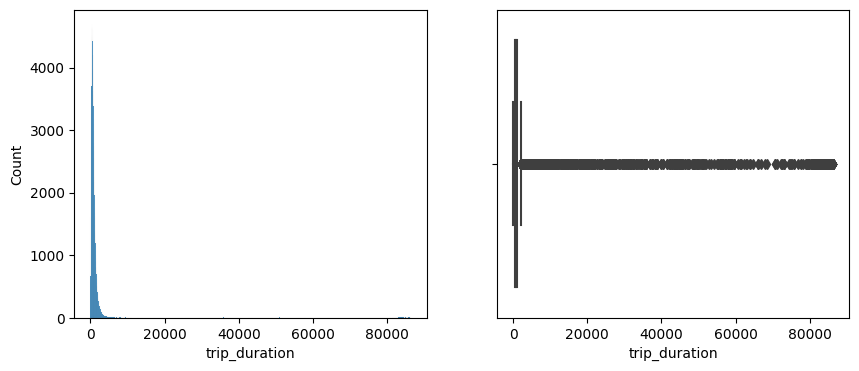

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -532.0 | IQR: 652.0 | Upper IQR: 2076.0
% of Outliers: 5.675


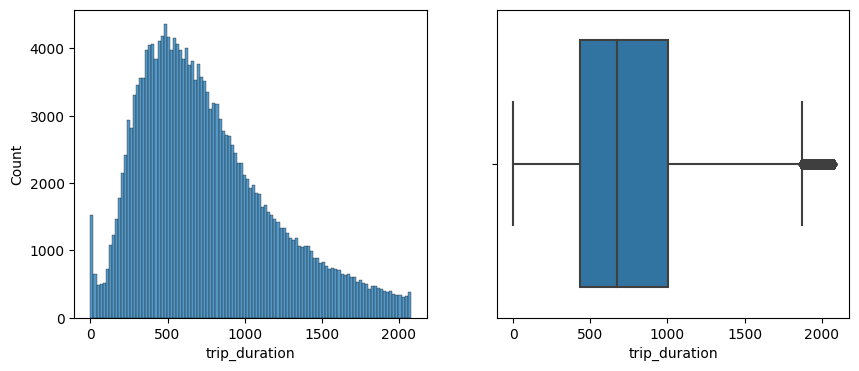

------------------------------
Distribution of Feature After Standardization


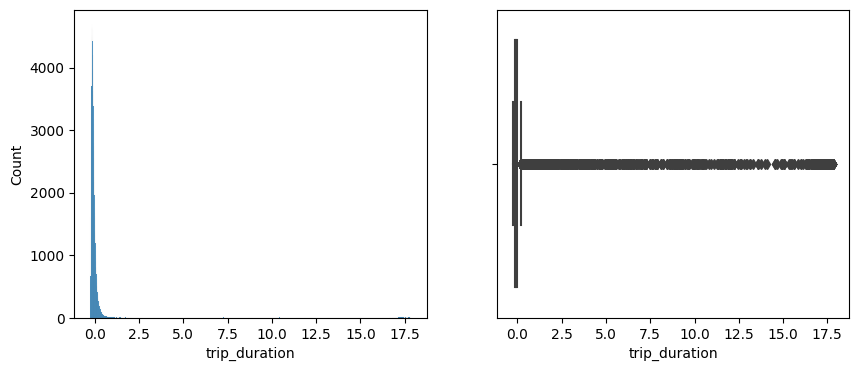

------------------------------
Distribution of Feature After Outlier Removal and Standardization


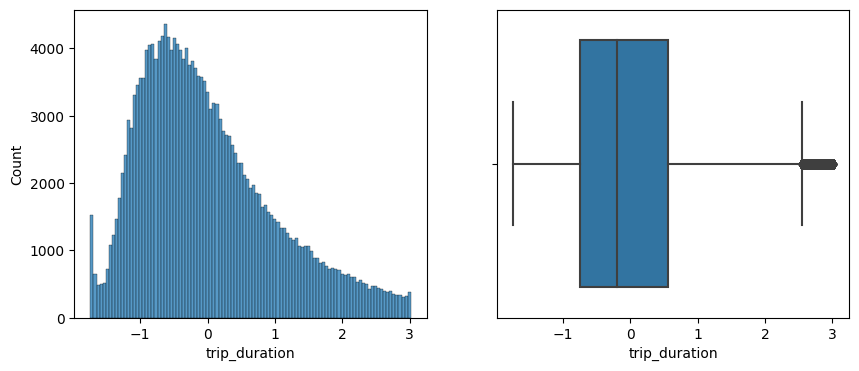

In [34]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=train, col='trip_duration')

**Test Set**

Distribution of Raw Feature


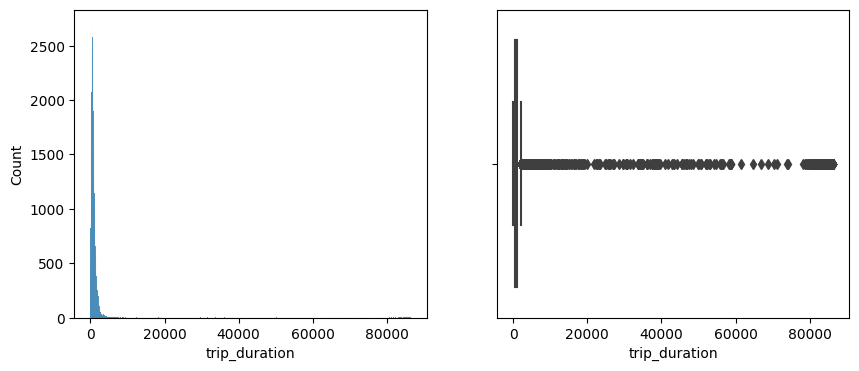

------------------------------
Distribution of Feature Without Outliers
Lower IQR: -526.0 | IQR: 648.0 | Upper IQR: 2066.0
% of Outliers: 5.608


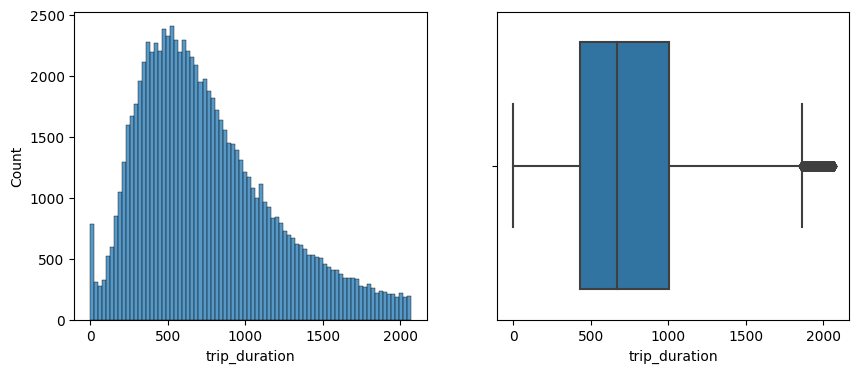

------------------------------
Distribution of Feature After Standardization


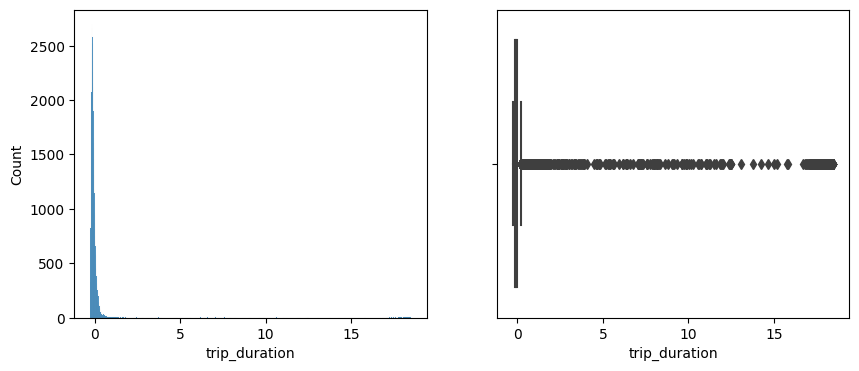

------------------------------
Distribution of Feature After Outlier Removal and Standardization


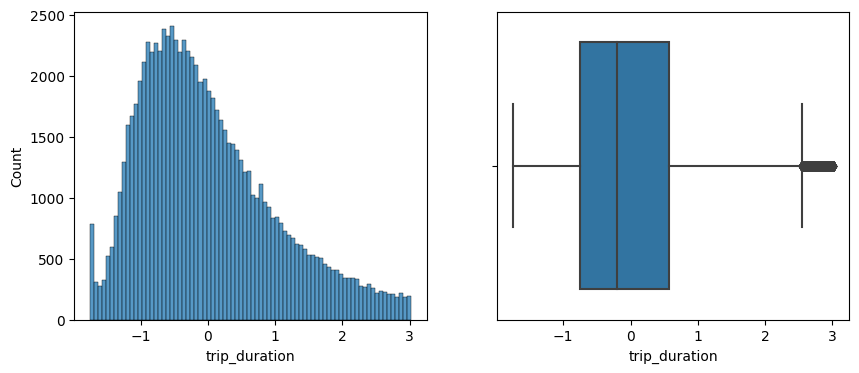

In [35]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=test, col='trip_duration')

### `distance_traveled`

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=train, col='distance_traveled')

Distribution of Raw Feature


KeyboardInterrupt: ignored

Error in callback <function _draw_all_if_interactive at 0x7f042741d7e0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
data_wo_outliers, data_std, data_wo_outliers_std = continuous_feature_eda(data=test, col='distance_traveled')